This project aims to perform image classification on at least one dataset of facial images to detect the emotional state of the individual in the image.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import datasets, layers, models
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, load_model, Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate

import os

from PIL import Image

import random

In [2]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


## How to Upload the Data

In [3]:
# import splitfolders
# splitfolders.ratio('data', output='output', seed=11037, ratio=(0.8, 0.1, 0.1))

In [4]:
train_dir = 'data/train'
test_dir = 'data/test'
val_dir = 'data/val'

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(train_dir, target_size=(48, 48), batch_size=25832)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, target_size=(48, 48), batch_size=7178)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_dir, target_size=(48, 48), batch_size=2877)

Found 25832 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 2877 images belonging to 7 classes.


In [5]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

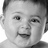

In [6]:
array_to_img(train_images[0])

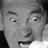

In [7]:
array_to_img(train_images[5])

In [8]:
arrays = [train_images, train_labels, test_images, test_labels, val_images, val_labels]

for array in arrays:
    print(np.shape(array))

(25832, 48, 48, 3)
(25832, 7)
(7178, 48, 48, 3)
(7178, 7)
(2877, 48, 48, 3)
(2877, 7)


In [9]:
train_labels[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [10]:
train_generator.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [11]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(25832, 6912)
(7178, 6912)
(2877, 6912)


In [12]:
train_y = np.reshape(train_labels[:,0], (25832,1))
test_y = np.reshape(test_labels[:,0], (7178,1))
val_y = np.reshape(val_labels[:,0], (2877,1))

In [14]:
# fig, ax = plt.subplots(1, 3, figsize=(15, 10))

# sample_angry = random.choice(os.listdir(train_dir + "paper"))
# image = load_img(train_dir + "paper/" + sample_paper)
# ax[0].imshow(image)
# ax[0].set_title("Paper")
# ax[0].axis("Off")

### Another Way to Upload the Data

In [15]:
base_dir = os.path.join("data/")

# Train set
train_dir = os.path.join(base_dir + "train/")
print("Train set --> ", os.listdir(train_dir))

# Test set
test_dir = os.path.join(base_dir + "test/")
print("Test set --> ", os.listdir(test_dir))

Train set -->  ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
Test set -->  ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


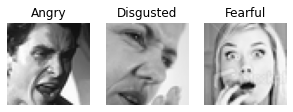

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(5, 3))

sample_angry = random.choice(os.listdir(train_dir + "angry"))
image = load_img(train_dir + "angry/" + sample_angry)
ax[0].imshow(image)
ax[0].set_title("Angry")
ax[0].axis("Off")

sample_disgusted = random.choice(os.listdir(train_dir + "disgusted"))
image = load_img(train_dir + "disgusted/" + sample_disgusted)
ax[1].imshow(image)
ax[1].set_title("Disgusted")
ax[1].axis("Off")

sample_fearful = random.choice(os.listdir(train_dir + "fearful"))
image = load_img(train_dir + "fearful/" + sample_fearful)
ax[2].imshow(image)
ax[2].set_title("Fearful")
ax[2].axis("Off")

plt.show()

# Baseline Model

In [17]:
# model = models.Sequential()
# model.add(layers.Dense(20, activation='relu', input_shape=(6912,))) # 2 hidden layers
# model.add(layers.Dense(7, activation='relu'))
# model.add(layers.Dense(5, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [19]:
# base_model = model.fit(train_img,
#                     train_y,
#                     epochs=100,
#                     batch_size=40,
#                     validation_data=(val_img, val_y))#,
#                     # callbacks=callbacks)

In [20]:
# model.summary()

In [21]:
# model.evaluate(train_img, train_y)

In [22]:
# model.evaluate(test_img, test_y)

# New Baseline

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=[48, 48, 1]))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(layers.Conv2D(64, 3, activation='relu', padding='same'))

model.add(layers.MaxPooling2D(2))

model.add(layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(layers.Conv2D(128, 3, activation='relu', padding='same'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
base_model = model.fit(train_img,
                    train_y,
                    epochs=100,
                    batch_size=40,
                    validation_data=(val_img, val_y))#,
                    # callbacks=callbacks)

Epoch 1/100


ValueError: in user code:

    C:\Users\Darklite\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Darklite\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Darklite\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Darklite\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Darklite\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Darklite\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Darklite\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\Darklite\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Darklite\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 6912]
